In [157]:
%matplotlib inline

In [158]:
import class_aggregates as ag
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import cufflinks as cf

In [159]:
py.init_notebook_mode(connected=True) # run at the start of every ipython notebook to use plotly.offline
                     # this injects the plotly.js source files into the notebook

# Create DataFrame of Aggregate Counts

In [160]:
infile = 'C:\Users\jc4673\Documents\Columbia\NETS_Clients2013ASCI\SIC_transformed.txt'
config_path = r'C:\Users\jc4673\Documents\Columbia\nets_wrangle\ranking_config.json'

config = ag.json_load(config_path)  # load the configuration file

sic_df = pd.read_table(infile)   # load the long sic code table into memory by data frame

# Apply mutually exclusive overall class by rankings
class_series = sic_df['Overall_Class'].apply(lambda x: ag.get_highest_rank(x, config))
# Join DunsNumber to overall class and drop duplicate DunsNumber (non longitudinal)
class_df = pd.concat([sic_df['DunsNumber'],class_series], axis=1).drop_duplicates(subset='DunsNumber')

counts = pd.DataFrame({'count' : class_df.groupby(by='Overall_Class').size()})

,count
Overall_Class,
aff,141
bds,125
cnv,283
des,9736
eat,1847
error,2
fsh,25
fvm,72
gry,413


# Plotly Plots

In [161]:
trace = go.Bar(
    x = counts.index.values, y=counts['count'].values)
data = [trace]
layout = dict(title = "Overall Business Classification Frequencies",
              xaxis = dict(title = 'Business Category'),
              yaxis = dict(title = 'Number of Businesses'))

In [162]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [163]:
counts.iplot(kind='bar', title='Overall Business Classification Frequencies',
             xTitle='Business Category',
             yTitle='Number of Businesses') #different method for the same plot

# Matplotlib Plots

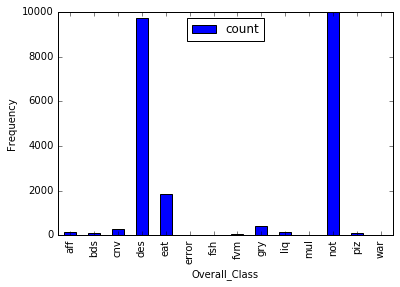

In [164]:
ax1 = counts.plot.bar(ylim=1000)
ax1.set_ylim(0,10000)
ax1.set_ylabel('Frequency')

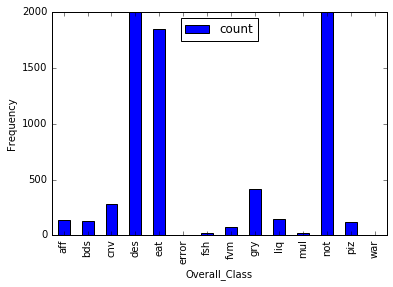

In [165]:
ax1 = counts.plot.bar(ylim=1000)
ax1.set_ylim(0,2000)
ax1.set_ylabel('Frequency')

Non-Represented Classes
-----------

* Bakeries
* Meat Markets
* Fruit and Vegetable Markets
* Natural food markets and nut stores
* Supermarkets
* Bars
* Urgent Care
* Health Practitioner Offices
* Residential Facilities With Health Care
* Pharmacies
* Mental Health Care Facilities
* Dental Care Facilities
* Vigorous Physical Activity Facilities
* Light/Moderate physical activity Facility
* Banks
* Credit Unions

**<font color = red>Keep in mind this is only ~0.9% of the Data, and the sample may not be truly random</font>**


# Longitudinal Plots

In [166]:
# Apply mutually exclusive overall class by rankings
class_long_series = sic_df['Class_Here'].apply(lambda x: ag.get_highest_rank(x, config))

In [167]:
# Add Year and grou
class_df = pd.concat([sic_df['Year'],class_long_series], axis=1)
grouped = class_df.groupby(['Year', 'Class_Here']).size().reset_index(name='counts')
grouped_pivot = grouped.pivot('Year','Class_Here','counts').fillna(0) #pivot for line graph

In [168]:
grouped_pivot.iplot(kind='line',
                    title = 'Business Categories Change over Time',
                    xTitle = 'Year',
                    yTitle = 'Number of Businesses') #full plot

In [169]:
# Remove "nots" and re-plot
grouped_notnot = grouped_pivot
del grouped_notnot['not']
grouped_notnot.iplot(kind='line', 
                     title = 'Business Categories Change over Time (Destinations Only)',
                     xTitle = 'Year',
                     yTitle = 'Number of Businesses')

In [170]:
# Remove "des" and re-plot
grouped_notdes = grouped_notnot
del grouped_notdes['des']
grouped_notdes.iplot(kind='line', 
                     title = 'Business Categories Change over Time (Specific Destinations Only)',
                     xTitle = 'Year',
                     yTitle = 'Number of Businesses')